# **TTI109 - Estatística**
## **T1 - Atividade Avaliada**
### Turmas T07 a T09 - Prof Vitor
- Dia: 16/09/2024
- Horário: 11:20
<br><br>

### **Instruções da Prova**
- **Duração da prova:** 80 minutos
- **Formato:** Pode ser realizada em duplas ou individualmente
- **Ferramenta:** A prova deve ser resolvida utilizando este Jupyter Notebook
- **Submissão:** O Notebook resolvido deve ser submetido na atividade correspondente no Canvas
- **Respostas:** As respostas das questões devem ser preenchidas no questionário do Canvas
- **Local e Horário:** A prova deve ser realizada no horário e sala designados para sua turma, exceto em casos previamente autorizados pelo professor

\
**Permissões:**
- **Consultas:** São permitidas consultas apenas ao material próprio do(s) aluno(s)

\
**Proibições:**
- O uso de ferramentas de IA (Inteligência Artificial) é estritamente proibido
- O uso de materiais de terceiros, como cópias ou plágio, será penalizado com nota zero

\
**Penalidades:**
- Submissões sem o Notebook resolvido serão zeradas
- Submissões sem a identificação de nome e RA do(s) aluno(s) serão desconsideradas
- Submissões a partir de número IP de fora da rede do Instituto Mauá de Tecnologia Campus SCS serão zeradas

\
**Como desativar o Assistente IA (Gemini) no Google Colab**
- Acesse as Configurações no canto superior direito da tela do Colab (ícone de engrenagem)
- Na aba de Configurações Gerais, procure pela opção "Assistência de IA"
- Marque a opção "Ocultar recursos de IA generativa"
- Clique no botão "Fechar"

\
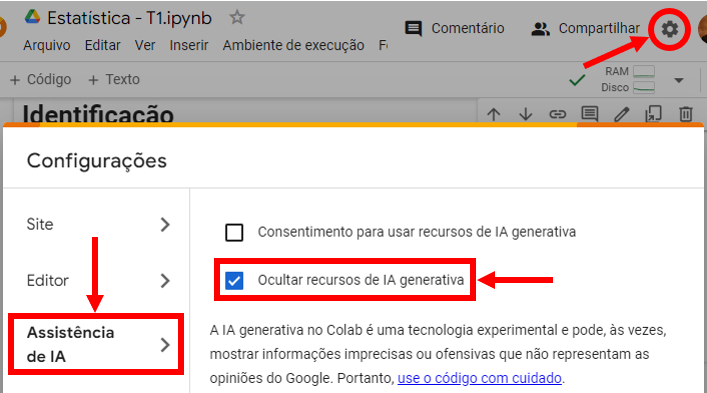


---



# **Identificação (*duplo clique para editar e inserir seus dados*)**

**Aluno(a) 1**

Victhor das Virgens de Lima Castro
RA 1 : 24.01503-2                                                




\
**Aluno(a) 2**

Robert Kevyn Gonçalves Gomes
RA 2: 24.01631-4

---

# **1. (2,0) Medidas de Dispersão**

As seguintes medições de temperatura (em graus Celsius) foram feitas em um laboratório:

```python
temperaturas = [25, 23, 26, 27, 24, 22, 26, 25, 24, 27]
```

\
**Calcule:**
```
a) A variância das temperaturas.
b) O desvio padrão das temperaturas.
c) O intervalo interquartil (IQR) *
```

\
$*$ **obs:** no item c utilize os métodos `.quantile(0.25, interpolation='lower')` para **Q1** e `.quantile(0.75, interpolation='higher')` para **Q3**

In [24]:
import pandas as pd
# Entrada de Dados
temperaturas = [25, 23, 26, 27, 24, 22, 26, 25, 24, 27]

df_temperaturas = pd.DataFrame(temperaturas, columns=['Temperaturas'])

# a) 
variancia = df_temperaturas['Temperaturas'].var()
print(f"a) Variância: {variancia:.2f}")

# b) 
desvio_padrao = df_temperaturas['Temperaturas'].std()
print(f"b) Desvio Padrão: {desvio_padrao:.2f}")

# c) 
Q1 = df_temperaturas['Temperaturas'].quantile(0.25, interpolation='lower')
Q3 = df_temperaturas['Temperaturas'].quantile(0.75, interpolation='higher')
IQR = Q3 - Q1
print(f"c) Intervalo Interquartil (IQR): {IQR}")


a) Variância: 2.77
b) Desvio Padrão: 1.66
c) Intervalo Interquartil (IQR): 2


---

# **2. (2,0) Medidas de Posição e Dispersão**

Os tempos de resposta (em segundos) de um sistema de atendimento foram medidos para 15 atendimentos, com os seguintes resultados:

```python
tempos = [12.5, 11.0, 15.0, 13.5, 14.0, 12.0, 11.5, 13.0, 14.5, 12.5, 15.0, 13.0, 12.0, 14.0, 13.5]
```

\
**Calcule:**
```
a) Media
b) Mediana
c) Moda
d) Quantidade de outliers
```

In [13]:
import pandas as pd
from scipy import stats

# Lista 
tempos = [12.5, 11.0, 15.0, 13.5, 14.0, 12.0, 11.5, 13.0, 14.5, 12.5, 15.0, 13.0, 12.0, 14.0, 13.5]

df_tempos = pd.DataFrame(tempos, columns=['Tempos'])

# a) 
media = df_tempos['Tempos'].mean()
print(f"a) Média: {media:.2f}")

# b) 
mediana = df_tempos['Tempos'].median()
print(f"b) Mediana: {mediana:.2f}")

# c) 
moda = df_tempos['Tempos'].mode()
moda_valor = moda[0] if not moda.empty else 'Nenhuma moda'
print(f"c) Moda: {moda_valor}")

# d) 
Q1 = df_tempos['Tempos'].quantile(0.25)
Q3 = df_tempos['Tempos'].quantile(0.75)
IQR = Q3 - Q1

# Limite outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contagem de outliers
outliers = df_tempos[(df_tempos['Tempos'] < limite_inferior) | (df_tempos['Tempos'] > limite_superior)]
quantidade_outliers = len(outliers)
print(f"d) Quantidade de outliers: {quantidade_outliers}")


a) Média: 13.13
b) Mediana: 13.00
c) Moda: 12.0
d) Quantidade de outliers: 0


---

# **3. (3,0) Cálculo do Desvio Padrão para Dados Agrupados**

Uma universidade deseja analisar o tempo que seus alunos gastam semanalmente em atividades extracurriculares. Os dados foram agrupados conforme a tabela abaixo:

| Horas de Atividade (Classe) | f (Núm Alunos) |
|-------------------------------|----------------------|
| 0-3                           | 6                    |
| 4-6                           | 9                    |
| 7-9                           | 12                   |
| 10-12                          | 8                    |

\
**Calcule:**
```
- O desvio padrão amostral para o tempo gasto nas atividades.
```

\
**Sugestão de sequência**
- Determinar os pontos médios de cada classe
- Calcule x*f
- Calcule o desvio
- Calcule os quadrados dos desvios parciais
- Calcule os quadrados dos desvios parciais vezes a frequência
- Some x*f
- Some f(Núm Funcionários)
- Calcule a média
- Calcule a soma dos quadrados dos desvios vezes a frequência
- Calcule o desvio padrão amostral

In [22]:
import numpy as np

# Entrada de Dados 
classes = [(0, 3), (4, 6), (7, 9), (10, 12)]
frequencias = [6, 9, 12, 8]

# 1. Determinar os pontos das médias para cada classe. 
pontos_medios = [(classe[0] + classe[1]) / 2 for classe in classes]

# 2. Calcular x*f
xf = [pontos_medios[i] * frequencias[i] for i in range(len(classes))]

# 3. Calcular a média
soma_xf = sum(xf)
soma_f = sum(frequencias)
media = soma_xf / soma_f

# 4. Calcular os desvios 
desvios = [pontos_medios[i] - media for i in range(len(classes))]

# 5. Calcular desvios parciais
quadrados_desvios = [desvio ** 2 for desvio in desvios]

# 6. Calcular desvios * frequencias 
quadrados_desvios_f = [quadrados_desvios[i] * frequencias[i] for i in range(len(classes))]

# 7. Calcular a soma dos quadrados dos desvios vezes a frequência
soma_quadrados_desvios_f = sum(quadrados_desvios_f)

# 10. Calcular o desvio padrão amostral
desvio_padrao_amostral = np.sqrt(soma_quadrados_desvios_f / (soma_f - 1))

# Resultado
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f}")

Desvio Padrão Amostral: 3.24


---

# **4. (3,0) Médias e Desvios Padrão de Populações**

Compare os escores-z dos salários de dois trabalhadores: um no setor de Marketing e outro no setor de Finanças. Suponha que as distribuições dos salários em ambos os setores sejam aproximadamente normais (curva de sino).

\
Os salários médios e desvios padrão para cada setor são os seguintes:

**Setor de Marketing:**
- Média (μ) = R$ 6.500

- Desvio padrão (σ) = R$ 1.000

**Setor de Finanças:**
- Média (μ) = R$ 8.000

- Desvio padrão (σ) = R$ 1.500

\
**Os salários dos trabalhadores são:**
- Trabalhador de Marketing: R$ 7.200

- Trabalhador de Finanças: R$ 9.500

\
**Calcule:**
```
- Os escores-z de cada trabalhador
- Compare quem está mais distante da média do seu setor
```

\
**Sugestão de sequência**
- Calcule o escore-z para o trabalhador do setor de Marketing e para o trabalhador do setor de Finanças.
- Compare os escores-z e determine qual trabalhador está mais distante da média do seu respectivo setor.
- Explique o que significa um escore-z mais alto em termos de posição relativa do salário dentro da distribuição do setor.

\
**Equação de escore-z:**
$$z = \frac{x - \mu}{\sigma}$$

**Onde:**
- $z$ é o escore-z
- $x$ é o valor da observação (neste caso, o salário do trabalhador)
- $\mu$ é a média da distribuição de salários no setor
- $\sigma$ é o desvio padrão da distribuição de salários no setor

In [25]:
# Dados fornecidos
media_marketing = 6500
desvio_padrao_marketing = 1000
salario_marketing = 7200

media_financas = 8000
desvio_padrao_financas = 1500
salario_financas = 9500

# Calcular o escore do marketing 
z_marketing = (salario_marketing - media_marketing) / desvio_padrao_marketing

# Calcular o escore do financeiro 
z_financas = (salario_financas - media_financas) / desvio_padrao_financas

# Comparar os escores entre financeiro e marketing
mais_distante = "Marketing" if abs(z_marketing) > abs(z_financas) else "Finanças"

# Resultados
print(f"Escore-z do trabalhador de Marketing: {z_marketing:.2f}")
print(f"Escore-z do trabalhador de Finanças: {z_financas:.2f}")
print(f"O trabalhador do setor de {mais_distante} está mais distante da média do seu setor.")

Escore-z do trabalhador de Marketing: 0.70
Escore-z do trabalhador de Finanças: 1.00
O trabalhador do setor de Finanças está mais distante da média do seu setor.
